In [1]:
import numpy as np
import pandas as pd 
import scipy
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import pickle

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
%matplotlib inline

#### This imports all of the data for King County Housing

In [2]:
df = pd.read_csv('data/kc_house_data_train.csv')

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


#### Data Cleaning 
This removes the random column called 'Unnamed: 0' and also fixes the 33 bedroom issue

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df['bedrooms']= np.where(df['bedrooms'] ==33, 3, df['bathrooms'])

<AxesSubplot:>

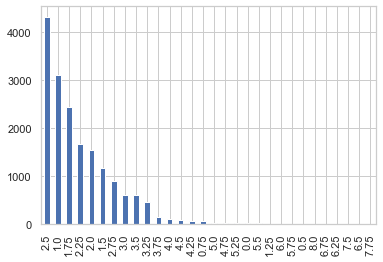

In [7]:
df['bedrooms'].value_counts().plot(kind='bar')

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zipcode', ylabel='price'>

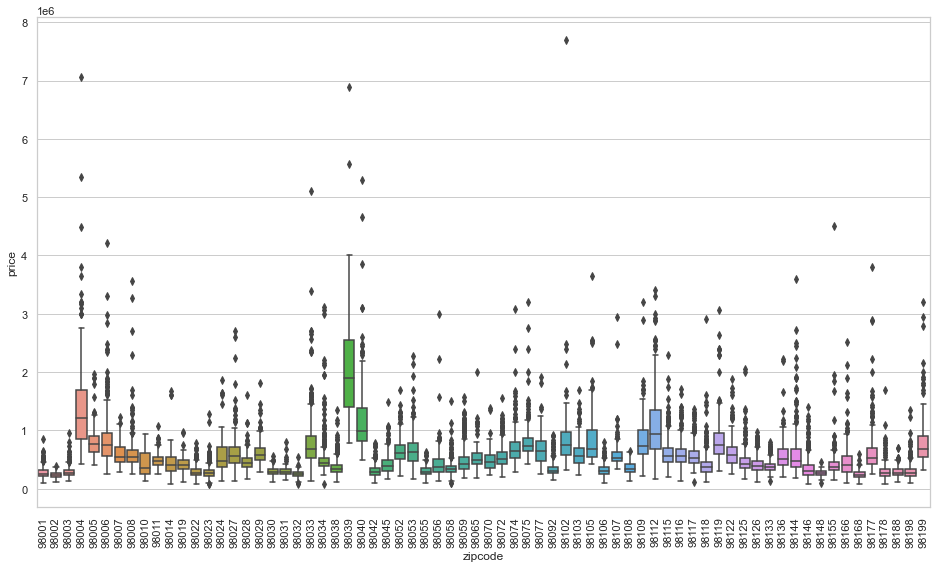

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
ax.tick_params(axis='x', labelrotation = 90)
sns.boxplot(df['zipcode'],df['price'],orient='v')

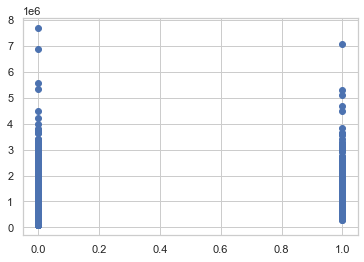

In [9]:
plt.scatter(df['waterfront'],df['price'])

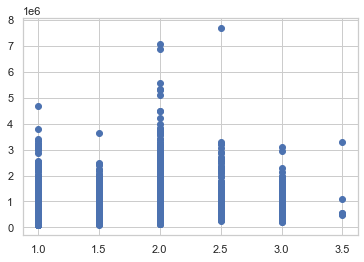

In [10]:
plt.scatter(df['floors'],df['price'])

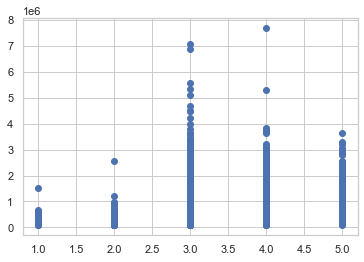

In [11]:
plt.scatter(df['condition'],df['price'])

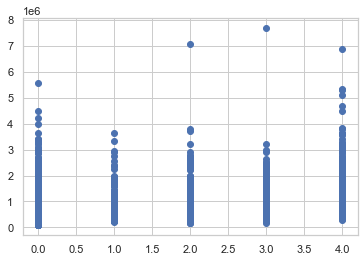

In [12]:
plt.scatter(df['view'],df['price'])

#### Feature Engineering

Here we find the square footage of the yard

In [13]:
df['yard_sqft'] = df['sqft_lot']-df['sqft_living']

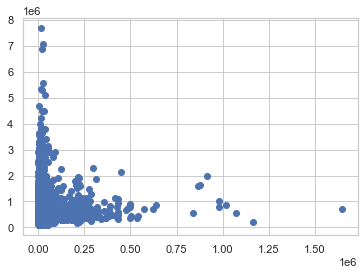

In [14]:
plt.scatter(df['yard_sqft'],df['price'])

###### Here we find the ANOVA of Grades and price

In [15]:
r1 = df[df['grade'] == 1].price
r3 = df[df['grade'] == 3].price
r4 = df[df['grade'] == 4].price
r5 = df[df['grade'] == 5].price
r6 = df[df['grade'] == 6].price
r7 = df[df['grade'] == 7].price
r8 = df[df['grade'] == 8].price
r9 = df[df['grade'] == 9].price
r10 = df[df['grade'] == 10].price
r11 = df[df['grade'] == 11].price
r12 = df[df['grade'] == 12].price
r13 = df[df['grade'] == 13].price

grade_anova = scipy.stats.f_oneway(r1,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13)
grade_anova

F_onewayResult(statistic=1763.5110290471393, pvalue=0.0)

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seattle Construction Grade on House VS House Price')

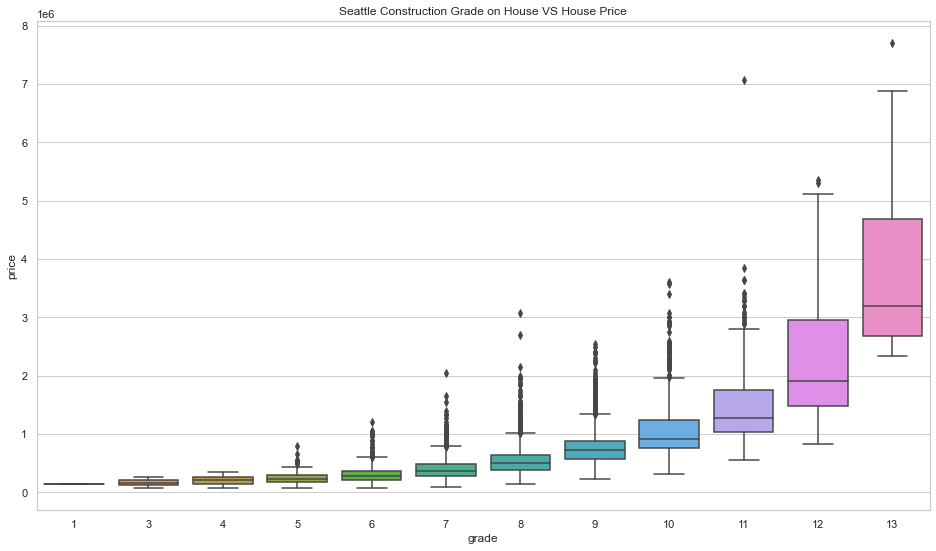

In [16]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(df['grade'],df['price'])
ax.set_title("Seattle Construction Grade on House VS House Price")

###### This changes all 0 bathrooms to 0.5, and then finds the average of bedrooms and bathrooms

In [17]:
df['bathrooms']= np.where(df['bathrooms'] == 0, 0.5, df['bathrooms'])
df['bathroom_avg'] = df['bedrooms']/df['bathrooms']
df['bed_bath_avg'] = df['bathroom_avg'].apply(lambda x: 1 if x > 0 else 0)

###### This sees if the house is bigger than the other 15 houses around it. Then makes it a dummy variable if it is or not

In [18]:
df['sqft_compared'] = df['sqft_living']-df['sqft_living15']
df['sqft_living_larger'] = df['sqft_compared'].apply(lambda x: 1 if x > 0 else 0)

###### Finds out if a house was renovated in the past or not, 1 for yes 0 for no

In [19]:
df['was_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
renovated_medians = df.groupby('was_renovated').median()['price']

In [21]:
scipy.stats.ttest_ind(df[df.was_renovated == 0].price,df[df.was_renovated == 1].price)

Ttest_indResult(statistic=-15.544856792041145, pvalue=4.007705820364685e-54)

Text(0.5, 1.0, 'Renovated vs Corresponding Median Prices')

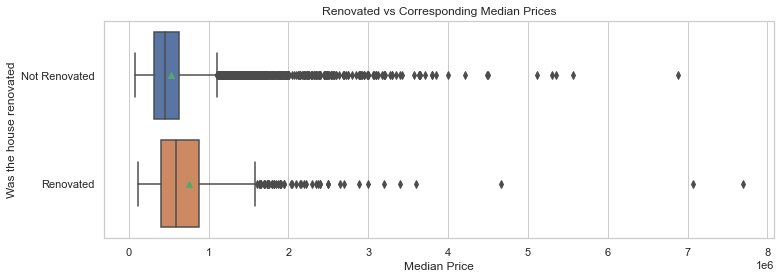

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
reno_box = sns.boxplot(y='was_renovated',x='price',data=df,showmeans=True,ax=ax,orient='h')
reno_box.set(yticklabels=['Not Renovated', 'Renovated'])
ax.set_ylabel('Was the house renovated')
ax.set_xlabel('Median Price')
ax.set_title('Renovated vs Corresponding Median Prices')

###### Uses the date column to find what month the house was sold

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['month'] = df['date'].dt.month

In [25]:
m1 = df[df['month'] == 1].price
m2 = df[df['month'] == 2].price
m3 = df[df['month'] == 3].price
m4 = df[df['month'] == 4].price
m5 = df[df['month'] == 5].price
m6 = df[df['month'] == 6].price
m7 = df[df['month'] == 7].price
m8 = df[df['month'] == 8].price
m9 = df[df['month'] == 9].price
m10 = df[df['month'] == 10].price
m11 = df[df['month'] == 11].price
m12 = df[df['month'] == 12].price

grade_anova = scipy.stats.f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)
grade_anova

F_onewayResult(statistic=2.7046975005044085, pvalue=0.0017444151469153434)

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

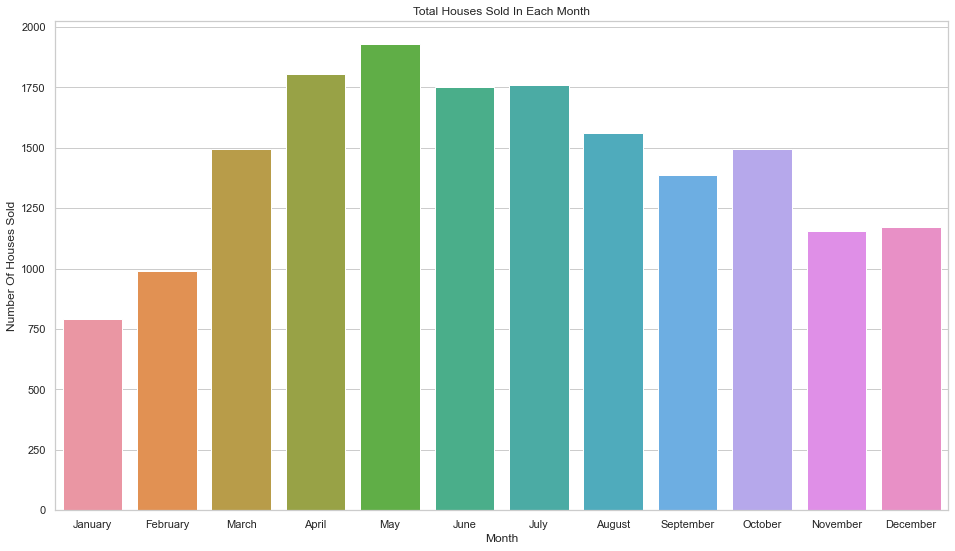

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(df['month'].value_counts().index,df['month'].value_counts().values)
ax.set_title('Total Houses Sold In Each Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number Of Houses Sold')
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])



###### Finds the ANOVA of the view score and price

In [27]:
r1 = df[df['view'] == 0].price
r2 = df[df['view'] == 1].price
r3 = df[df['view'] == 2].price
r4 = df[df['view'] == 3].price
r5 = df[df['view'] == 4].price


grade_anova = scipy.stats.f_oneway(r1,r3,r4,r5)
grade_anova

F_onewayResult(statistic=1134.59715239667, pvalue=0.0)

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Persons view of house VS House Price')

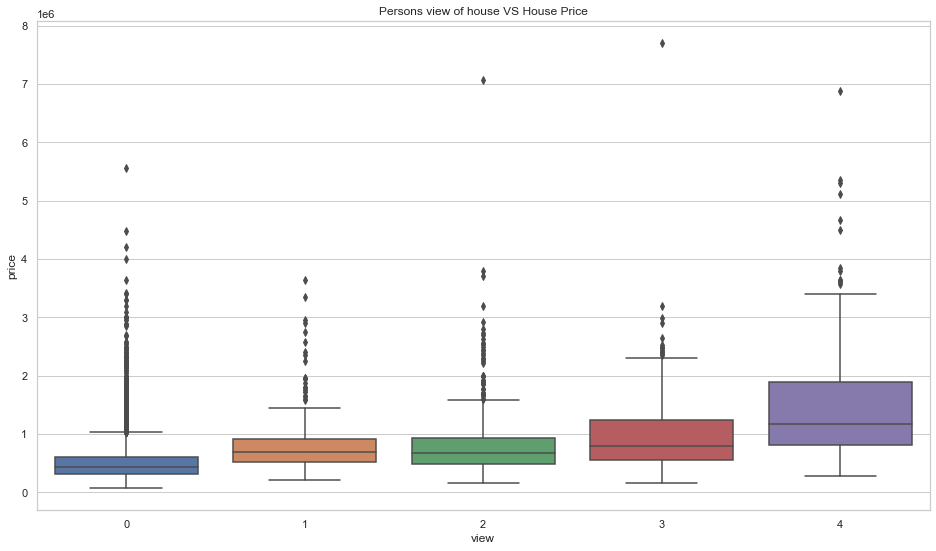

In [28]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(df['view'],df['price'])
ax.set_title("Persons view of house VS House Price")

###### Creates a new dataframe where the dummy variables are saved. Removes unused columns

In [29]:
df_dummies = df.copy()

In [30]:
df_dummies.drop(['id','date','lat','long','bedrooms','bathrooms','bathroom_avg','sqft_compared','grade'],axis=1,inplace=True)

In [31]:
df_dummies = pd.get_dummies(df_dummies,columns=['zipcode'],drop_first=True)
df_dummies = pd.get_dummies(df_dummies,columns=['floors'],drop_first=True)
df_dummies = pd.get_dummies(df_dummies,columns=['view'],drop_first=True)
df_dummies = pd.get_dummies(df_dummies,columns=['month'], prefix ='month',drop_first=True)

##### Find the Ordinary Least Squares of the colums kept

In [32]:
x = df_dummies.drop(columns='price')
y = df_dummies.price
ols(formula='y~x', data=df_dummies).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     685.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:10:31   Log-Likelihood:            -2.3241e+05
No. Observations:               17290   AIC:                         4.650e+05
Df Residuals:                   17188   BIC:                         4.658e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.551e+05   1.57e+05     -2.257      0.024   -6.63e+05   -4.68e+04
x[0]         115.5671      1.531     75.506      0.000     112.567     118.567
x[1]          57.9341      0.764     75.805      0.000      56.436      59.432
x[2]        5.921e+05   1.81e+04     32.717      0.000    5.57e+05    6.28e+05
x[3]        3.077e+04   2232.004     13.786      0.000    2.64e+04    3.51e+04
x[4]         107.9322      2.081     51.869      0.000     103.854     112.011
x[5]           7.6407      2.376      3.216      0.001       2.984      12.297
x[6]          45.0887     72.873      0.619      0.536     -97.750     187.928
x[7]        3180.2208    400.431      7.942      0.000    2395.336    3965.105
x[8]           4.2429      3.677      1.154      0.249      -2.964      11.450
x[9]          -0.1174      0.069     -1.704      0.088      -0.253       0.018
x[10]        -57.6657      0.767    -75.206      0.000     -59.169     -56.163
x[11]      -4.123e+04   5.99e+04     -0.689      0.491   -1.59e+05    7.61e+04
x[12]      -6.645e+04   3485.837    -19.061      0.000   -7.33e+04   -5.96e+04
x[13]      -6.294e+06   7.99e+05     -7.875      0.000   -7.86e+06   -4.73e+06
x[14]       1.663e+04   1.67e+04      0.998      0.318    -1.6e+04    4.93e+04
x[15]      -2425.6528   1.49e+04     -0.162      0.871   -3.17e+04    2.69e+04
x[16]       8.151e+05   1.49e+04     54.565      0.000    7.86e+05    8.44e+05
x[17]       3.192e+05   1.74e+04     18.337      0.000    2.85e+05    3.53e+05
x[18]       2.866e+05   1.33e+04     21.540      0.000    2.61e+05    3.13e+05
x[19]       2.676e+05   1.81e+04     14.762      0.000    2.32e+05    3.03e+05
x[20]        2.51e+05    1.5e+04     16.772      0.000    2.22e+05     2.8e+05
x[21]        6.13e+04   2.19e+04      2.799      0.005    1.84e+04    1.04e+05
x[22]       1.314e+05   1.65e+04      7.985      0.000    9.92e+04    1.64e+05
x[23]       1.078e+05   1.97e+04      5.473      0.000    6.92e+04    1.46e+05
x[24]       7.889e+04   1.71e+04      4.602      0.000    4.53e+04    1.12e+05
x[25]      -7734.2784   1.59e+04     -0.487      0.626   -3.89e+04    2.34e+04
x[26]       -2.48e+04   1.29e+04     -1.921      0.055   -5.01e+04     510.165
x[27]       1.479e+05   2.33e+04      6.344      0.000    1.02e+05    1.94e+05
x[28]       1.755e+05   1.36e+04     12.891      0.000    1.49e+05    2.02e+05
x[29]       1.258e+05   1.51e+04      8.356      0.000    9.63e+04    1.55e+05
x[30]        2.36e+05   1.46e+04     16.162      0.000    2.07e+05    2.65e+05
x[31]      -1107.7604   1.54e+04     -0.072      0.943   -3.13e+04    2.91e+04
x[32]       8068.0108   1.51e+04      0.534      0.594   -2.16e+04    3.77e+04
x[33]       1.895e+04   1.92e+04      0.985      0.325   -1.88e+04    5.67e+04
x[34]        3.75e+05   1.34e+04     28.078      0.000    3.49e+05    4.01e+05
x[

In [33]:
df_dummies.corr()

,price,sqft_living,sqft_lot,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,yard_sqft,bed_bath_avg,sqft_living_larger,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
price,1.000000,0.703540,0.086803,0.275779,0.036099,0.607760,0.323312,0.056450,0.117770,0.585567,0.081423,0.071747,0.001904,0.223046,0.117409,-0.079096,-0.076717,0.270366,0.064889,0.124801,0.012829,0.030831,-0.020349,-0.013093,-0.017358,-0.027669,-0.065326,-0.104858,0.008269,0.024946,-0.021943,0.024313,-0.070984,-0.072183,-0.059959,0.101606,-0.007262,-0.075885,0.219701,0.199329,-0.098235,-0.029724,0.047366,0.050565,-0.069471,-0.044213,-0.075343,-0.018443,-0.004379,-0.009161,0.007813,0.058627,0.087974,0.035470,-0.069836,0.071764,0.021747,0.087568,-0.074458,0.012757,-0.046430,0.063122,1.743648e-01,0.032511,0.024873,0.012703,-0.053841,0.082551,0.024683,-0.024139,-0.039607,-0.063628,0.007550,0.027147,-0.056960,-0.035934,-0.045335,-0.018183,-0.090086,0.034662,-0.068552,-0.053705,-0.071636,8.250801e-02,0.009874,0.229135,0.134143,0.020449,0.025001,0.091073,0.138504,0.176706,0.317456,-0.021160,-0.002363,0.019362,0.012133,0.018905,4.019544e-03,-0.000825,-0.011211,0.000096,-0.008759,-1.032504e-02
sqft_living,0.703540,1.000000,0.166810,0.109738,-0.061530,0.876696,0.435529,0.319397,0.051448,0.755066,0.179570,0.145557,0.005051,0.470311,0.051159,-0.048220,-0.017726,0.113783,0.058706,0.128092,0.000534,0.005764,0.006015,0.016749,0.002062,0.012361,-0.030438,-0.014144,0.018768,0.060564,0.006449,0.029388,-0.012867,-0.015812,-0.031718,0.049177,-0.018771,0.013965,0.096565,0.125568,-0.021005,-0.006935,0.053267,0.081287,-0.033504,-0.007597,-0.006954,0.052684,0.062005,-0.014292,0.033239,0.088892,0.128044,0.082587,0.019379,0.012326,-0.075749,0.010088,-0.080578,-0.058582,-0.038305,-0.000166,5.576899e-02,-0.046046,-0.031276,-0.074852,-0.071109,-0.005669,-0.039003,-0.044765,-0.073066,-0.076949,-0.041202,-0.013726,-0.057380,-0.026674,-0.048775,0.001784,-0.074257,0.015918,-0.041365,-0.025332,-0.041584,1.368945e-02,-0.063345,0.418355,0.111929,-0.052340,0.012918,0.065190,0.123936,0.157149,0.178710,-0.016711,-0.025527,-0.006582,0.006396,0.018301,1.734542e-02,0.001007,0.001481,0.003855,-0.003850,2.543783e-03
sqft_lot,0.086803,0.166810,1.000000,0.015356,-0.013715,0.180755,0.008065,0.054228,0.004520,0.136959,0.701875,0.999769,-0.000772,0.046045,0.004608,-0.017440,-0.012096,-0.004359,0.008391,-0.007379,-0.010048,-0.013689,0.054587,-0.008553,0.153972,0.049584,0.131429,-0.017088,0.137939,0.059826,-0.008261,-0.021534,-0.006699,-0.008614,-0.008584,-0.016452,-0.019769,0.042974,0.002279,-0.004358,0.010868,0.090308,-0.015872,0.070167,-0.014236,-0.020174,0.018054,-0.003270,0.010145,0.148493,0.043229,-0.003231,0.010561,0.091210,0.059258,-0.018139,-0.045700,-0.023663,-0.028746,-0.031685,-0.022123,-0.019508,-2.679824e-02,-0.038237,-0.030202,-0.040514,-0.034706,-0.025460,-0.032503,-0.

### Model Evaluation

###### See if data is overfit

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=9,test_size=0.2)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

In [35]:
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

In [36]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 167633.69636333283
Testing Root Mean Squared Error: 162982.18751912884


Data was not overfit

In [37]:
df['price'].std()

373318.9787492793

In [38]:
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)

In [39]:
test_mae/df['price'].std()

0.26689483740948944

In [40]:
test_rmse/df['price'].std()

0.43657621711375016

### Filter Selection

###### Recursive Feature Selection

In [41]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7,  scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 

selector.fit(X_train, y_train)

Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.


RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [42]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [43]:
len(selected_rfe)

100

In [44]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

In [45]:
#your code here 
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])


In [46]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rfe))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 167674.50478989744
Testing Root Mean Squared Error: 162826.71510370827


###### Polynomial Feature Selection

In [47]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(x)
poly2_columns = poly_2.get_feature_names(x.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,sqft_living,sqft_lot,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,yard_sqft,bed_bath_avg,sqft_living_larger,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living condition,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living yard_sqft,sqft_living bed_bath_avg,sqft_living sqft_living_larger,sqft_living was_renovated,sqft_living zipcode_98002,sqft_living zipcode_98003,sqft_living zipcode_98004,sqft_living zipcode_98005,sqft_living zipcode_98006,sqft_living zipcode_98007,sqft_living zipcode_98008,sqft_living zipcode_98010,sqft_living zipcode_98011,sqft_living zipcode_98014,sqft_living zipcode_98019,sqft_living zipcode_98022,sqft_living zipcode_98023,sqft_living zipcode_98024,sqft_living zipcode_98027,sqft_living zipcode_98028,sqft_living zipcode_98029,sqft_living zipcode_98030,sqft_living zipcode_98031,sqft_living zipcode_98032,sqft_living zipcode_98033,sqft_living zipcode_98034,sqft_living zipcode_98038,sqft_living zipcode_98039,sqft_living zipcode_98040,sqft_living zipcode_98042,sqft_living zipcode_98045,sqft_living zipcode_98052,sqft_living zipcode_98053,sqft_living zipcode_98055,sqft_living zipcode_98056,sqft_living zipcode_98058,sqft_living zipcode_98059,...,floors_3.0 view_2,floors_3.0 view_3,floors_3.0 view_4,floors_3.0 month_2,floors_3.0 month_3,floors_3.0 month_4,floors_3.0 month_5,floors_3.0 month_6,floors_3.0 month_7,floors_3.0 month_8,floors_3.0 month_9,floors_3.0 month_10,floors_3.0 month_11,floors_3.0 month_12,floors_3.5^2,floors_3.5 view_1,floors_3.5 view_2,floors_3.5 view_3,floors_3.5 view_4,floors_3.5 month_2,floors_3.5 month_3,floors_3.5 month_4,floors_3.5 month_5,floors_3.5 month_6,floors_3.5 month_7,floors_3.5 month_8,floors_3.5 month_9,floors_3.5 month_10,floors_3.5 month_11,floors_3.5 month_12,view_1^2,view_1 view_2,view_1 view_3,view_1 view_4,view_1 month_2,view_1 month_3,view_1 month_4,view_1 month_5,view_1 month_6,view_1 month_7,view_1 month_8,view_1 month_9,view_1 month_10,view_1 month_11,view_1 month_12,view_2^2,view_2 view_3,view_2 view_4,view_2 month_2,view_2 month_3,view_2 month_4,view_2 month_5,view_2 month_6,view_2 month_7,view_2 month_8,view_2 month_9,view_2 month_10,view_2 month_11,view_2 month_12,view_3^2,view_3 view_4,view_3 month_2,view_3 month_3,view_3 month_4,view_3 month_5,view_3 month_6,view_3 month_7,view_3 month_8,view_3 month_9,view_3 month_10,view_3 month_11,view_3 month_12,view_4^2,view_4 month_2,view_4 month_3,view_4 month_4,view_4 month_5,view_4 month_6,view_4 month_7,view_4 month_8,view_4 month_9,view_4 month_10,view_4 month_11,view_4 month_12,month_2^2,month_2 month_3,month_2 month_4,month_2 month_5,month_2 month_6,month_2 month_7,month_2 month_8,month_2 month_9,month_2 month_10,month

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly2, y, random_state=9,test_size=0.2)

In [49]:
X_test.head()

,sqft_living,sqft_lot,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,yard_sqft,bed_bath_avg,sqft_living_larger,was_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
13347,1610,11201,0,5,1020,590,1982,0,1610,9000,9591,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12171,1610,13309,0,4,1610,0,1967,0,1610,15725,11699,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5900,1900,5520,0,3,1280,620,1982,0,1330,5196,3620,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7160,2690,5564,0,3,2690,0,2007,0,2210,4046,2874,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13494,1170,8740,0,4,1170,0,1968,0,1870,8448,7570,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train2, y_train2)

y_train_pred2 = lm_2.predict(X_train2)

train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))


print('Training Root Mean Squared Error:' , train_rmse2)

Training Root Mean Squared Error: 97682.3929592418


In [51]:
# use fitted model to predict on test data
y_pred2 = lm_2.predict(X_test2)

test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Testing Root Mean Squared Error:' , test_rmse2)


print('Training: ', int(train_rmse2), "vs. Testing: ", int(test_rmse2))

Testing Root Mean Squared Error: 170390.36639454318
Training:  97682 vs. Testing:  170390


###### Using KBest to find best features

In [52]:
selector = SelectKBest(f_regression, k=100)
selector.fit(X_train2, y_train2)

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=100, score_func=<function f_regression at 0x7fc2e4529f70>)

In [53]:
selector.get_support()

array([ True, False,  True, ..., False, False, False])

In [54]:
selected_columns = X_train2.columns[selector.get_support()]
removed_columns = X_train2.columns[~selector.get_support()]

In [55]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train2[selected_columns], y_train2)

y_train_kbest = lm_kbest.predict(X_train2[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test2[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 185622.70442868752
Testing Root Mean Squared Error: 183660.26498677154


### Comparing results
The Testing RMSE for the Eecursive Feature Selection is smaller than the Polynomial, so our final will be the Recursive

###### Fit to the whole model

In [56]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df_dummies[selected_rfe], y)

In [57]:
len(selected_rfe)

100

In [58]:
len(lm.coef_)

100

### Save final model with Pickle

In [59]:
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [60]:
pickle_out = open('other_info.pickle', "wb")
pickle.dump(selected_rfe, pickle_out)
pickle_out.close()